In [2]:
%pip install pandas qrcode[pil] openpyxl

  Using cached qrcode-7.4.2-py3-none-any.whl.metadata (17 kB)
     ---------------------------------------- 0.0/59.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/59.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/59.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/59.7 kB ? eta -:--:--
     ------ --------------------------------- 10.2/59.7 kB ? eta -:--:--
     -------------------------------------- 59.7/59.7 kB 785.8 kB/s eta 0:00:00
  Using cached pypng-0.20220715.0-py3-none-any.whl.metadata (13 kB)
  Using cached pillow-10.4.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---

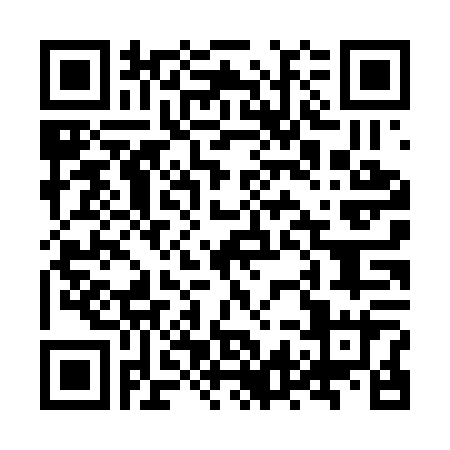

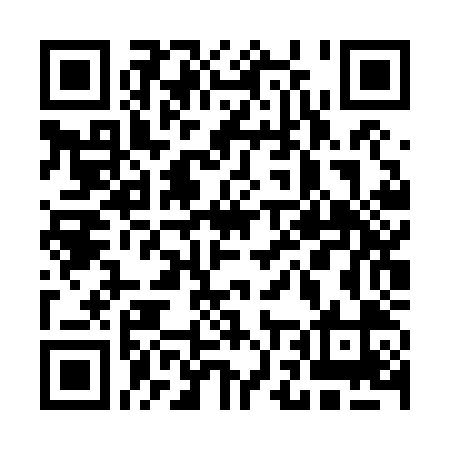

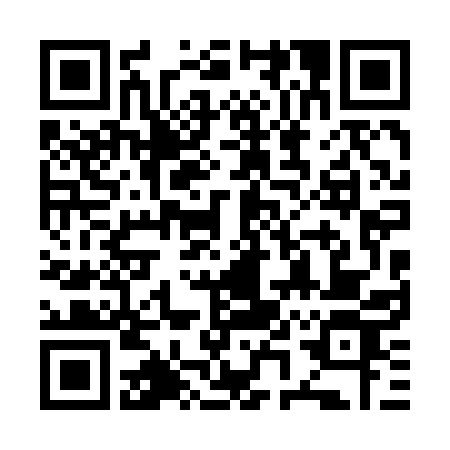

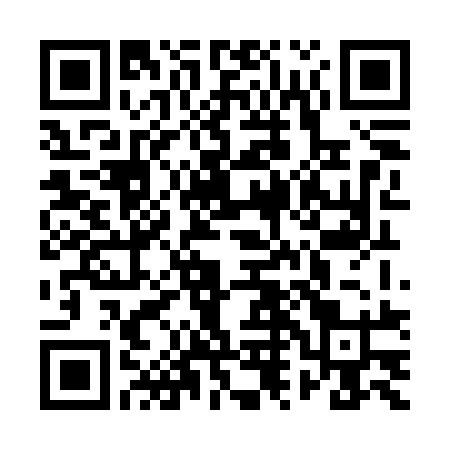

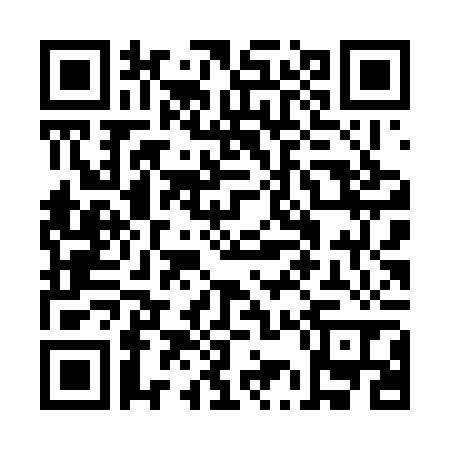

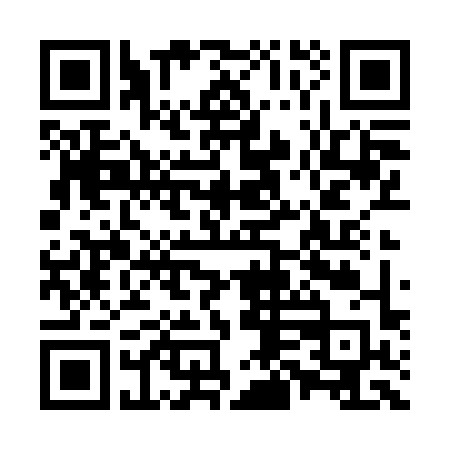

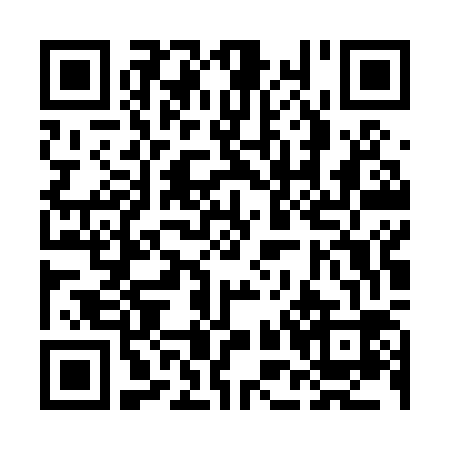

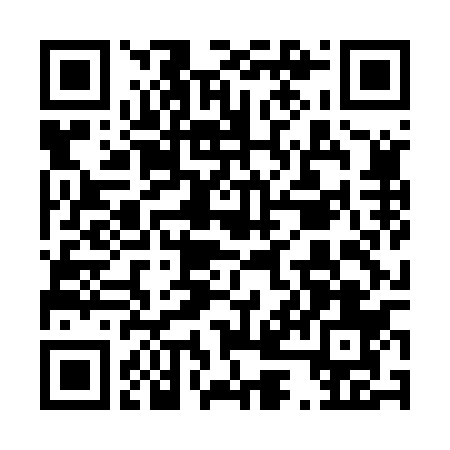

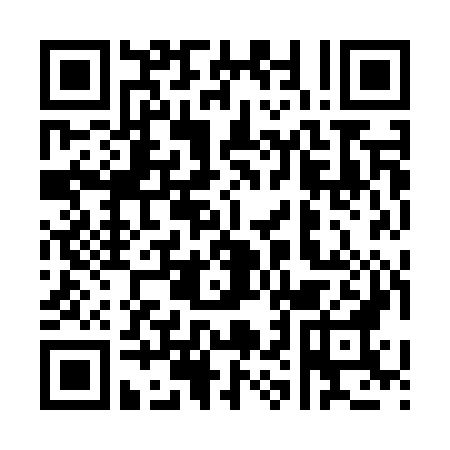

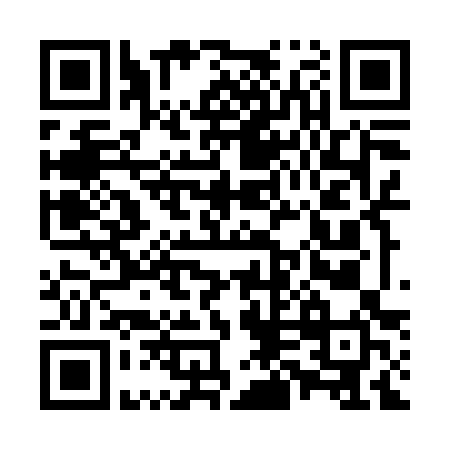

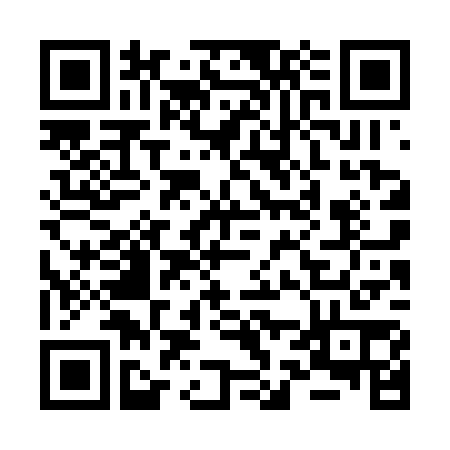

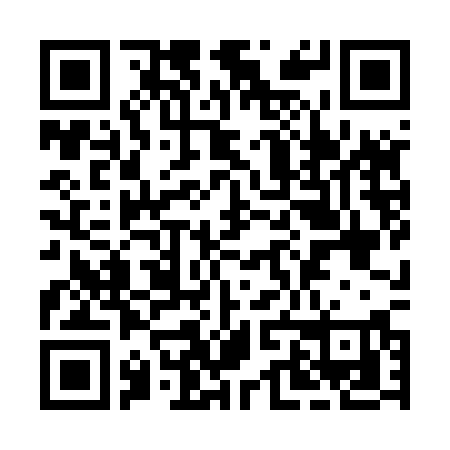

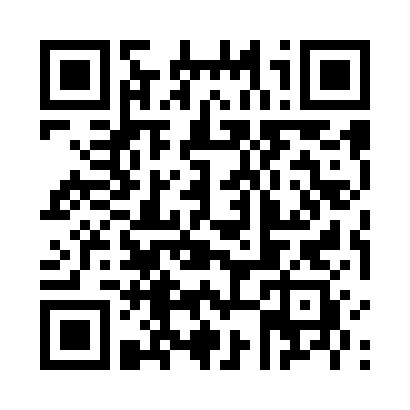

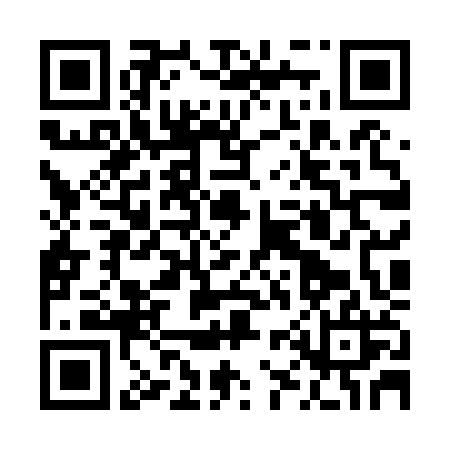

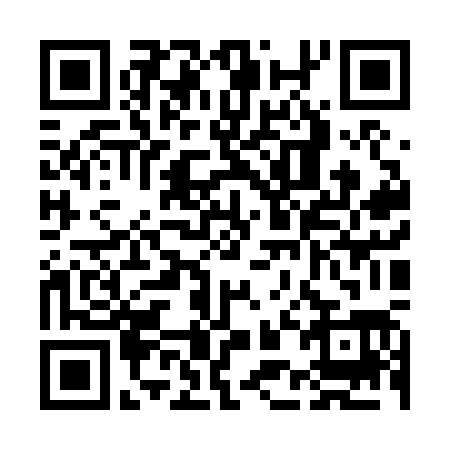

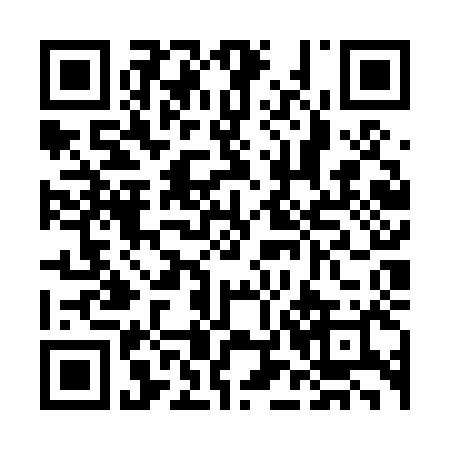

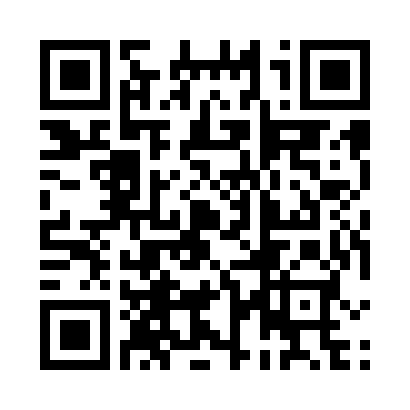

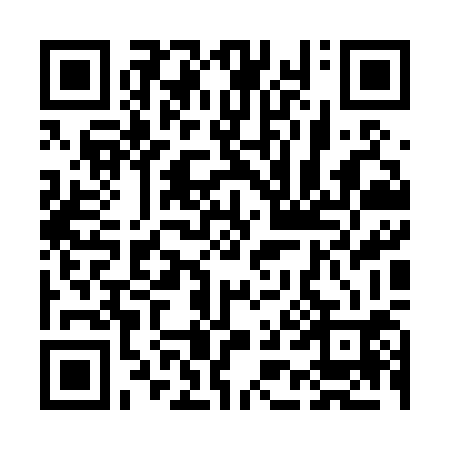

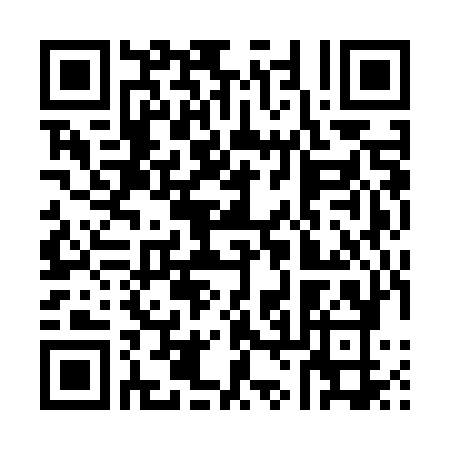

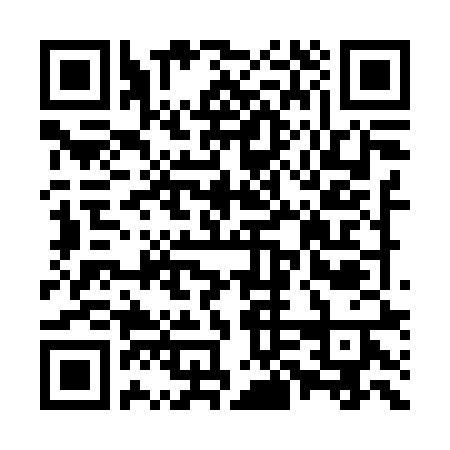

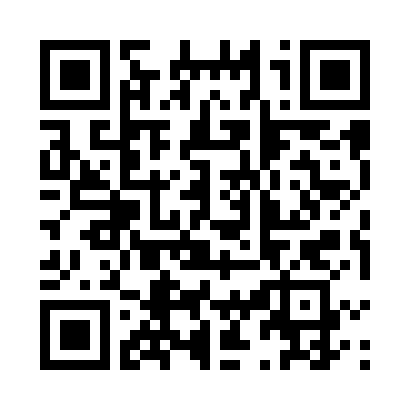

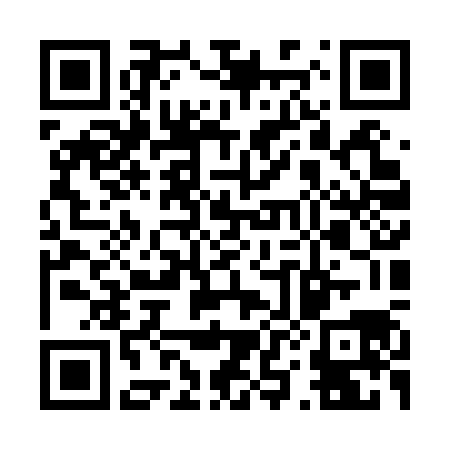

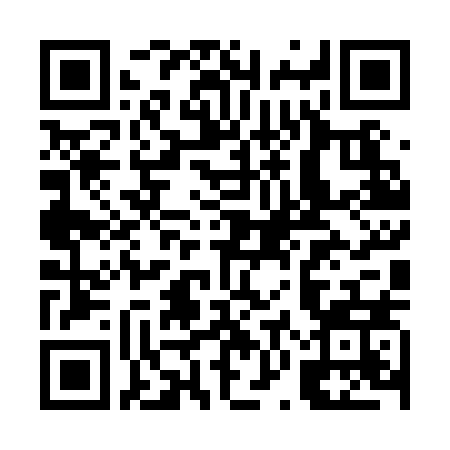

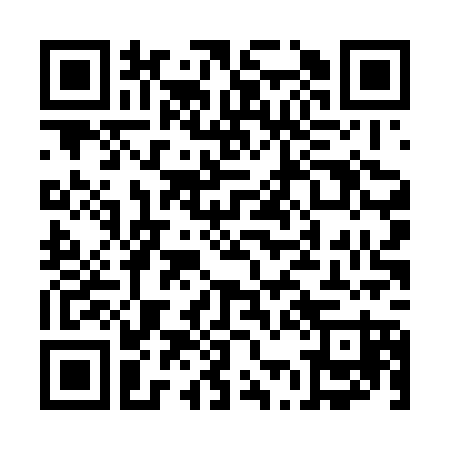

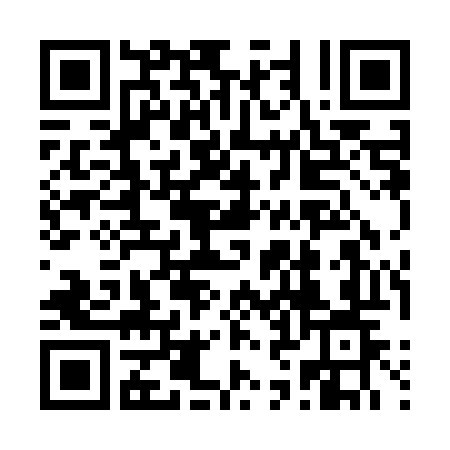

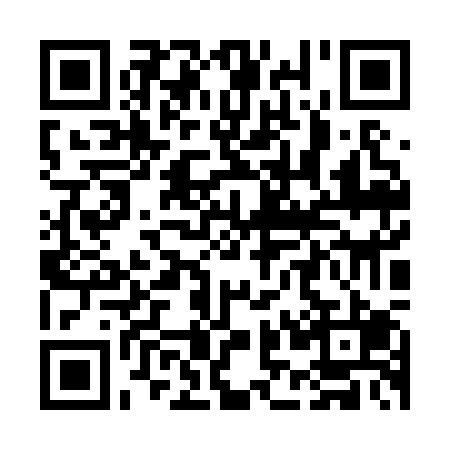

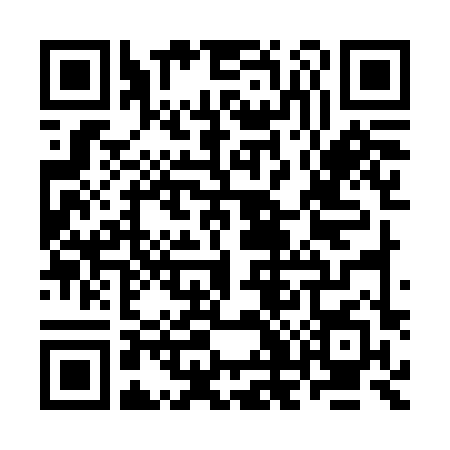

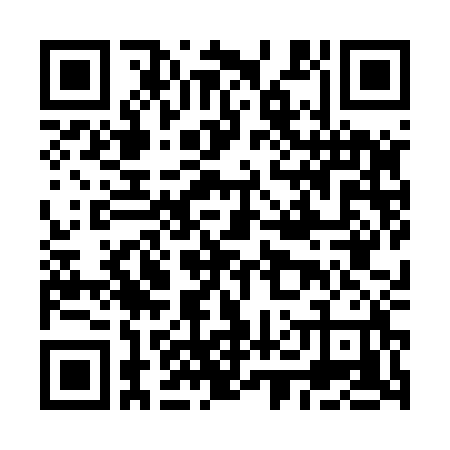

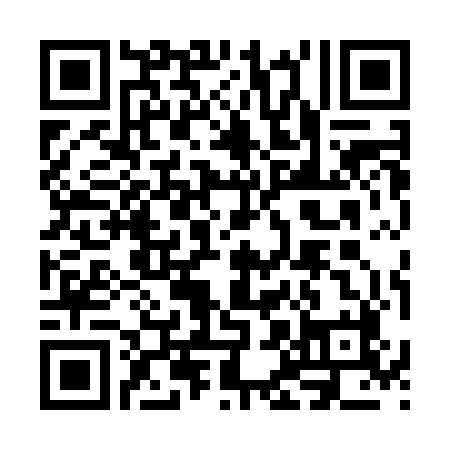

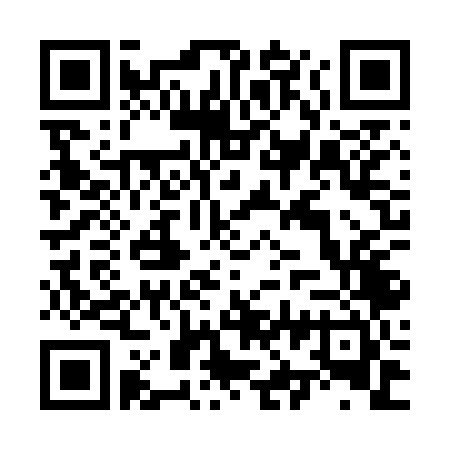

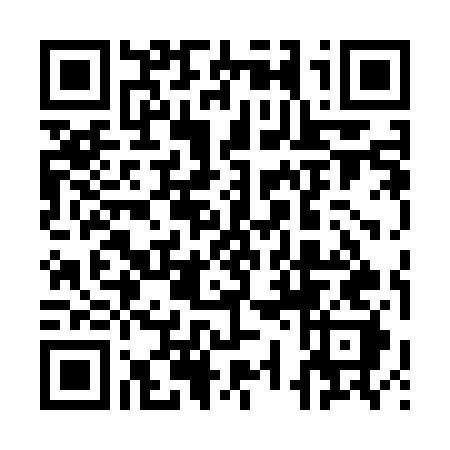

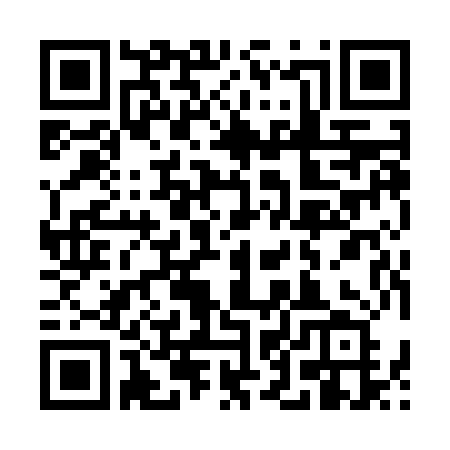

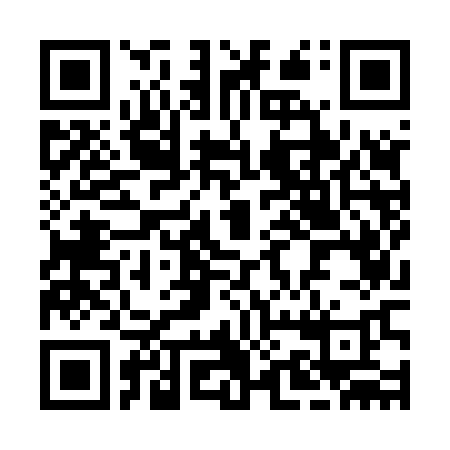

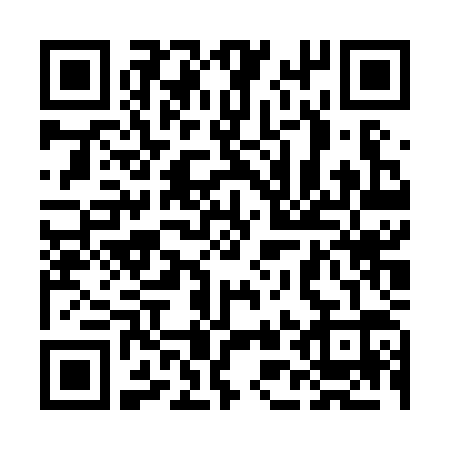

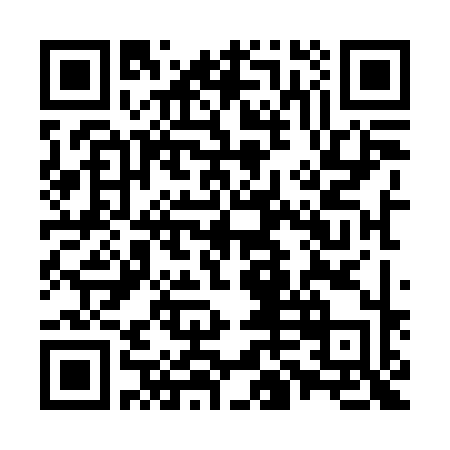

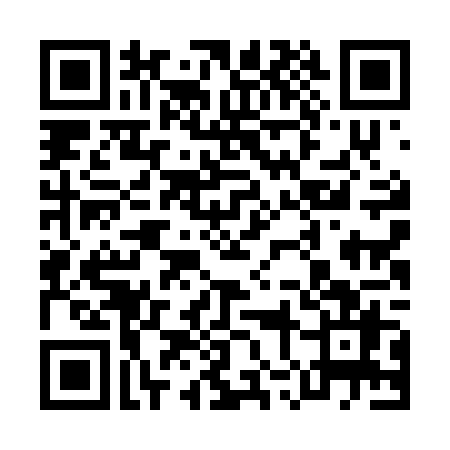

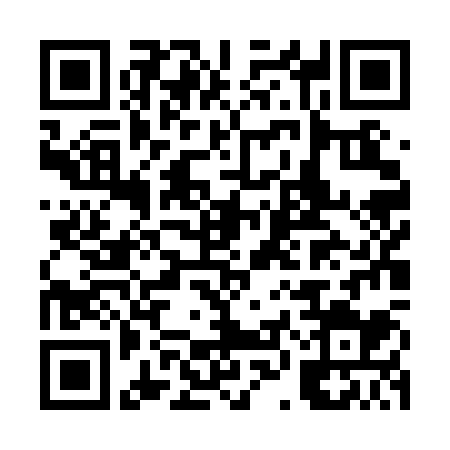

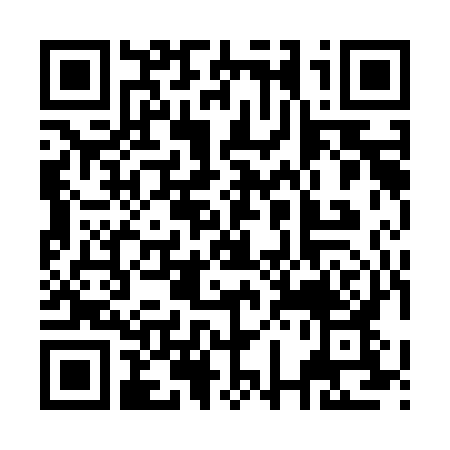

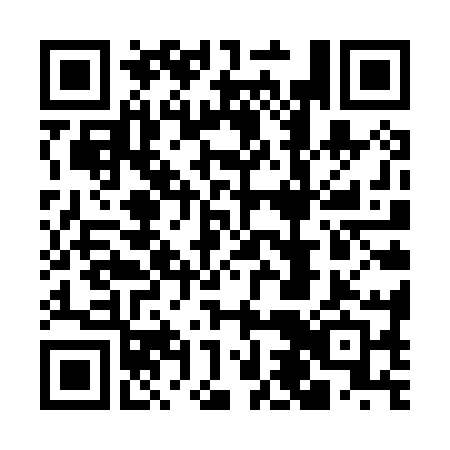

In [4]:
import pandas as pd
import qrcode
import os
from IPython.display import display, Image

# Function to generate QR code for each entry and display in Jupyter Notebook
def generate_qr(name, phone1, email, phone2=None):
    # Create QR data based on the inputs
    contact_info = f"Name: {name}\nPhone 1: {phone1}\nEmail: {email}"
    if phone2:  # If Phone 2 is provided, include it
        contact_info += f"\nPhone 2: {phone2}"

    # Create QR code object
    qr = qrcode.QRCode(
        version=1,
        error_correction=qrcode.constants.ERROR_CORRECT_L,
        box_size=10,
        border=4,
    )

    qr.add_data(contact_info)
    qr.make(fit=True)

    # Create an image from the QR code
    img = qr.make_image(fill='black', back_color='white')

    # Ensure the directory exists
    if not os.path.exists('QR_codes'):
        os.makedirs('QR_codes')

    # Save the image to a file
    file_name = f"QR_codes/{name.replace(' ', '_')}_QR.png"
    img.save(file_name)

    # Display the QR code in the notebook
    display(Image(filename=file_name))

# Load Excel file and generate QR codes
def generate_qr_from_excel(file_path):
    # Read the Excel file using pandas
    data = pd.read_excel(file_path)

    # Loop through each row in the Excel sheet and generate QR codes
    for index, row in data.iterrows():
        name = row['Name']
        phone1 = row['Phone 1']
        phone2 = row.get('Phone 2', None)  # Handle the optional phone 2 field
        email = row['Email']

        # Generate and display the QR code for each entry
        generate_qr(name, phone1, email, phone2)

# Provide the path to your Excel file
excel_file = 'contacts.xlsx'  # Replace with your actual file name
generate_qr_from_excel(excel_file)

In [6]:
import pandas as pd
import qrcode
from qrcode.image.svg import SvgImage

# Step 1: Read the Excel file
contacts = pd.read_excel('contacts.xlsx')

# Step 2: Generate QR codes and save them as SVG files
for index, row in contacts.iterrows():
    # Create a string for the QR code (you can customize this)
    contact_info = f"Name: {row['Name']}\nPhone 1: {row['Phone 1']}\nPhone 2: {row['Phone 2']}\nEmail: {row['Email']}"
    
    # Generate QR code
    qr = qrcode.QRCode(
        version=1,
        error_correction=qrcode.constants.ERROR_CORRECT_L,
        box_size=10,
        border=4,
    )
    qr.add_data(contact_info)
    qr.make(fit=True)

    # Create an SVG image from the QR code
    svg_image = qr.make_image(image_factory=SvgImage)
    
    # Save the SVG file
    svg_filename = f"qr_code_{index + 1}.svg"
    svg_image.save(svg_filename)
    print(f"Saved QR code for {row['Name']} as {svg_filename}")

Saved QR code for Jaffar Hussain as qr_code_1.svg
Saved QR code for Subhan Rehman as qr_code_2.svg
Saved QR code for Waqas Arshad as qr_code_3.svg
Saved QR code for Waqas Khan as qr_code_4.svg
Saved QR code for Hassan Rizvi as qr_code_5.svg
Saved QR code for Usama Qadir as qr_code_6.svg
Saved QR code for Waseem Akram as qr_code_7.svg
Saved QR code for Muhammad Farhan as qr_code_8.svg
Saved QR code for Ghulam Mustafa as qr_code_9.svg
Saved QR code for Atif Hafeez as qr_code_10.svg
Saved QR code for Hudaib Safdar as qr_code_11.svg
Saved QR code for Faisal Iqbal as qr_code_12.svg
Saved QR code for Bazil Khan as qr_code_13.svg
Saved QR code for Asim Riaz Tanoli  as qr_code_14.svg
Saved QR code for Sohail Tariq as qr_code_15.svg
Saved QR code for Rukhsana Ali as qr_code_16.svg
Saved QR code for Ume Habiba as qr_code_17.svg
Saved QR code for Rameel Iqbal as qr_code_18.svg
Saved QR code for Alina Shakeel  as qr_code_19.svg
Saved QR code for Ahmer Kamal as qr_code_20.svg
Saved QR code for Waqa

In [1]:
%pip install pandas qrcode[pil] openpyxl

In [5]:
%pip install pandas qrcode[pil] openpyxl qrcode[svg]

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Step 1: Import necessary libraries
import pandas as pd
import qrcode
from qrcode.image.svg import SvgImage
from io import BytesIO

# Step 2: Load the Excel file (Make sure the contacts.xlsx file is in the same directory)
df = pd.read_excel('contacts.xlsx')

# Step 3: Function to create vCard string for each contact
def create_vcard(name, mobile_1, mobile_2, email):
    vcard = f"BEGIN:VCARD\nVERSION:3.0\nFN:{name}\n"
    
    # Add Mobile 1 if exists
    if pd.notna(mobile_1):
        vcard += f"TEL;TYPE=CELL:{mobile_1}\n"
    
    # Add Mobile 2 only if it's not blank or NaN
    if pd.notna(mobile_2):
        vcard += f"TEL;TYPE=CELL:{mobile_2}\n"
    
    # Add Email if exists
    if pd.notna(email):
        vcard += f"EMAIL:{email}\n"
    
    vcard += "END:VCARD"
    
    return vcard

# Step 4: Function to generate and save QR code as SVG
def generate_qr_code_svg(data, output_filename):
    qr = qrcode.QRCode(
        version=1, 
        error_correction=qrcode.constants.ERROR_CORRECT_L, 
        box_size=10, 
        border=4
    )
    qr.add_data(data)
    qr.make(fit=True)
    
    # Generate the SVG image
    img = qr.make_image(image_factory=SvgImage)
    
    # Save the image as an SVG file
    with open(output_filename, 'wb') as f:
        img.save(f)
    return img

# Step 5: Iterate through the DataFrame and create QR codes for each contact
for index, row in df.iterrows():
    name = row['Name']
    mobile_1 = row['Mobile 1']
    mobile_2 = row['Mobile 2']
    email = row['Email']
    
    # Create the vCard for each contact
    vcard_data = create_vcard(name, mobile_1, mobile_2, email)
    
    # Generate the QR code in SVG format
    output_filename = f"qr_{name}.svg"
    generate_qr_code_svg(vcard_data, output_filename)
    
    # Print success message
    print(f"QR code generated for {name} and saved as {output_filename}")

KeyError: 'Mobile 1'

In [6]:
df = pd.read_excel('contacts.xlsx')
print(df.columns)

Index(['Name', 'Phone 1', 'Phone 2', 'Email'], dtype='object')


In [7]:
# Step 1: Import necessary libraries
import pandas as pd
import qrcode
from qrcode.image.svg import SvgImage
from io import BytesIO

# Step 2: Load the Excel file and check the column names
df = pd.read_excel('contacts.xlsx')

# Optionally print column names for debugging
print("Columns in the Excel file:", df.columns)

# Clean up column names if there are leading/trailing spaces
df.columns = df.columns.str.strip()

# Step 3: Function to create vCard string for each contact
def create_vcard(name, phone_1, phone_2, email):
    vcard = f"BEGIN:VCARD\nVERSION:3.0\nFN:{name}\n"
    
    # Add Phone 1 if exists
    if pd.notna(phone_1):
        vcard += f"TEL;TYPE=CELL:{phone_1}\n"
    
    # Add Phone 2 only if it's not blank or NaN
    if pd.notna(phone_2):
        vcard += f"TEL;TYPE=CELL:{phone_2}\n"
    
    # Add Email if exists
    if pd.notna(email):
        vcard += f"EMAIL:{email}\n"
    
    vcard += "END:VCARD"
    
    return vcard

# Step 4: Function to generate and save QR code as SVG
def generate_qr_code_svg(data, output_filename):
    qr = qrcode.QRCode(
        version=1, 
        error_correction=qrcode.constants.ERROR_CORRECT_L, 
        box_size=10, 
        border=4
    )
    qr.add_data(data)
    qr.make(fit=True)
    
    # Generate the SVG image
    img = qr.make_image(image_factory=SvgImage)
    
    # Save the image as an SVG file
    with open(output_filename, 'wb') as f:
        img.save(f)
    return img

# Step 5: Iterate through the DataFrame and create QR codes for each contact
for index, row in df.iterrows():
    name = row['Name']
    phone_1 = row['Phone 1']
    phone_2 = row['Phone 2']
    email = row['Email']
    
    # Create the vCard for each contact
    vcard_data = create_vcard(name, phone_1, phone_2, email)
    
    # Generate the QR code in SVG format
    output_filename = f"qr_{name}.svg"
    generate_qr_code_svg(vcard_data, output_filename)
    
    # Print success message
    print(f"QR code generated for {name} and saved as {output_filename}")

Columns in the Excel file: Index(['Name', 'Phone 1', 'Phone 2', 'Email'], dtype='object')
QR code generated for Jaffar Hussain and saved as qr_Jaffar Hussain.svg
QR code generated for Subhan Rehman and saved as qr_Subhan Rehman.svg
QR code generated for Waqas Arshad and saved as qr_Waqas Arshad.svg
QR code generated for Waqas Khan and saved as qr_Waqas Khan.svg
QR code generated for Hassan Rizvi and saved as qr_Hassan Rizvi.svg
QR code generated for Usama Qadir and saved as qr_Usama Qadir.svg
QR code generated for Waseem Akram and saved as qr_Waseem Akram.svg
QR code generated for Muhammad Farhan and saved as qr_Muhammad Farhan.svg
QR code generated for Ghulam Mustafa and saved as qr_Ghulam Mustafa.svg
QR code generated for Atif Hafeez and saved as qr_Atif Hafeez.svg
QR code generated for Hudaib Safdar and saved as qr_Hudaib Safdar.svg
QR code generated for Faisal Iqbal and saved as qr_Faisal Iqbal.svg
QR code generated for Bazil Khan and saved as qr_Bazil Khan.svg
QR code generated fo